In [1]:
# Difference in difference analysis using python
# Topic: Did elimination of copayment increase visits to the physician?
# Copayment for visting a physical for 16 years and yonger eliminated in Norway 2010

In [12]:

import pandas as pd
from pandas_profiling import ProfileReport
import statsmodels.formula.api as smf 
import statsmodels.api as sm  
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv('data/njmin3.csv')
df.head()

,CO_OWNED,SOUTHJ,CENTRALJ,PA1,PA2,DEMP,nj,bk,kfc,roys,wendys,d,d_nj,fte
0,0,0,1,0,0,12.00,1,1,0,0,0,0,0,15.00
1,0,0,1,0,0,6.50,1,1,0,0,0,0,0,15.00
2,0,0,1,0,0,-1.00,1,0,0,1,0,0,0,24.00
3,1,0,0,0,0,2.25,1,0,0,1,0,0,0,19.25
4,0,0,0,0,0,13.00,1,1,0,0,0,0,0,21.50


In [13]:
model = smf.ols(formula = "fte ~ d_nj + kfc + roys + wendys + CO_OWNED + SOUTHJ + CENTRALJ + PA1", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     27.47
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           9.44e-38
Time:                        19:32:36   Log-Likelihood:                -2809.2
No. Observations:                 794   AIC:                             5636.
Df Residuals:                     785   BIC:                             5679.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3532      0.601     40.549      0.0

In [14]:

# NJ Before and after
NJ_before = df.loc[(df['nj']==1) & (df['d']!=1),'fte'].mean()
NJ_after  = df.loc[(df['nj']==1) & (df['d']==1),'fte'].mean()

# PA Before and after
PA_before = df.loc[(df['nj']!=1) & (df['d']!=1),'fte'].mean()
PA_after  = df.loc[(df['nj']!=1) & (df['d']==1),'fte'].mean()

# NJ counterfactual (if no treatment)
NJ_counterfactual = NJ_before + ( NJ_before - PA_before )

[NJ_before, NJ_after,
 PA_before,PA_after,
 NJ_before, NJ_counterfactual]

[20.439408099688475,
 21.02742946708464,
 23.33116883116883,
 21.165584415584416,
 20.439408099688475,
 17.547647368208118]

Text(0.5, 1.0, 'Difference-in-difference: Before and After')

<Figure size 320x240 with 0 Axes>

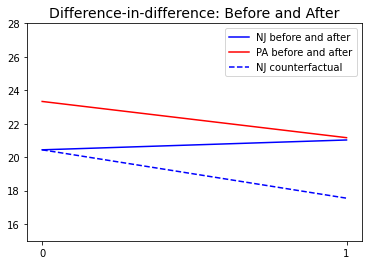

In [23]:
%matplotlib inline
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
lineNJ, = ax.plot(['0', '1'], [NJ_before, NJ_after],color='blue',label='NJ before and after')
linePA, = ax.plot(['0', '1'], [PA_before, PA_after],color = 'red',label = 'PA before and after')
lineNJ0, = ax.plot(['0', '1'], [NJ_before, NJ_counterfactual],color = 'blue',linestyle='dashed',label='NJ counterfactual')
ax.legend()
plt.ylim(15, 28)  
plt.title("Difference-in-difference: Before and After", fontsize="14")
